In [32]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

%matplotlib inline

In [33]:
# Load the data set
HouseDF = pd.read_csv('Linear_Regression_House_Dataset.csv')

In [4]:
HouseDF.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [5]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
HouseDF.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [7]:
HouseDF.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

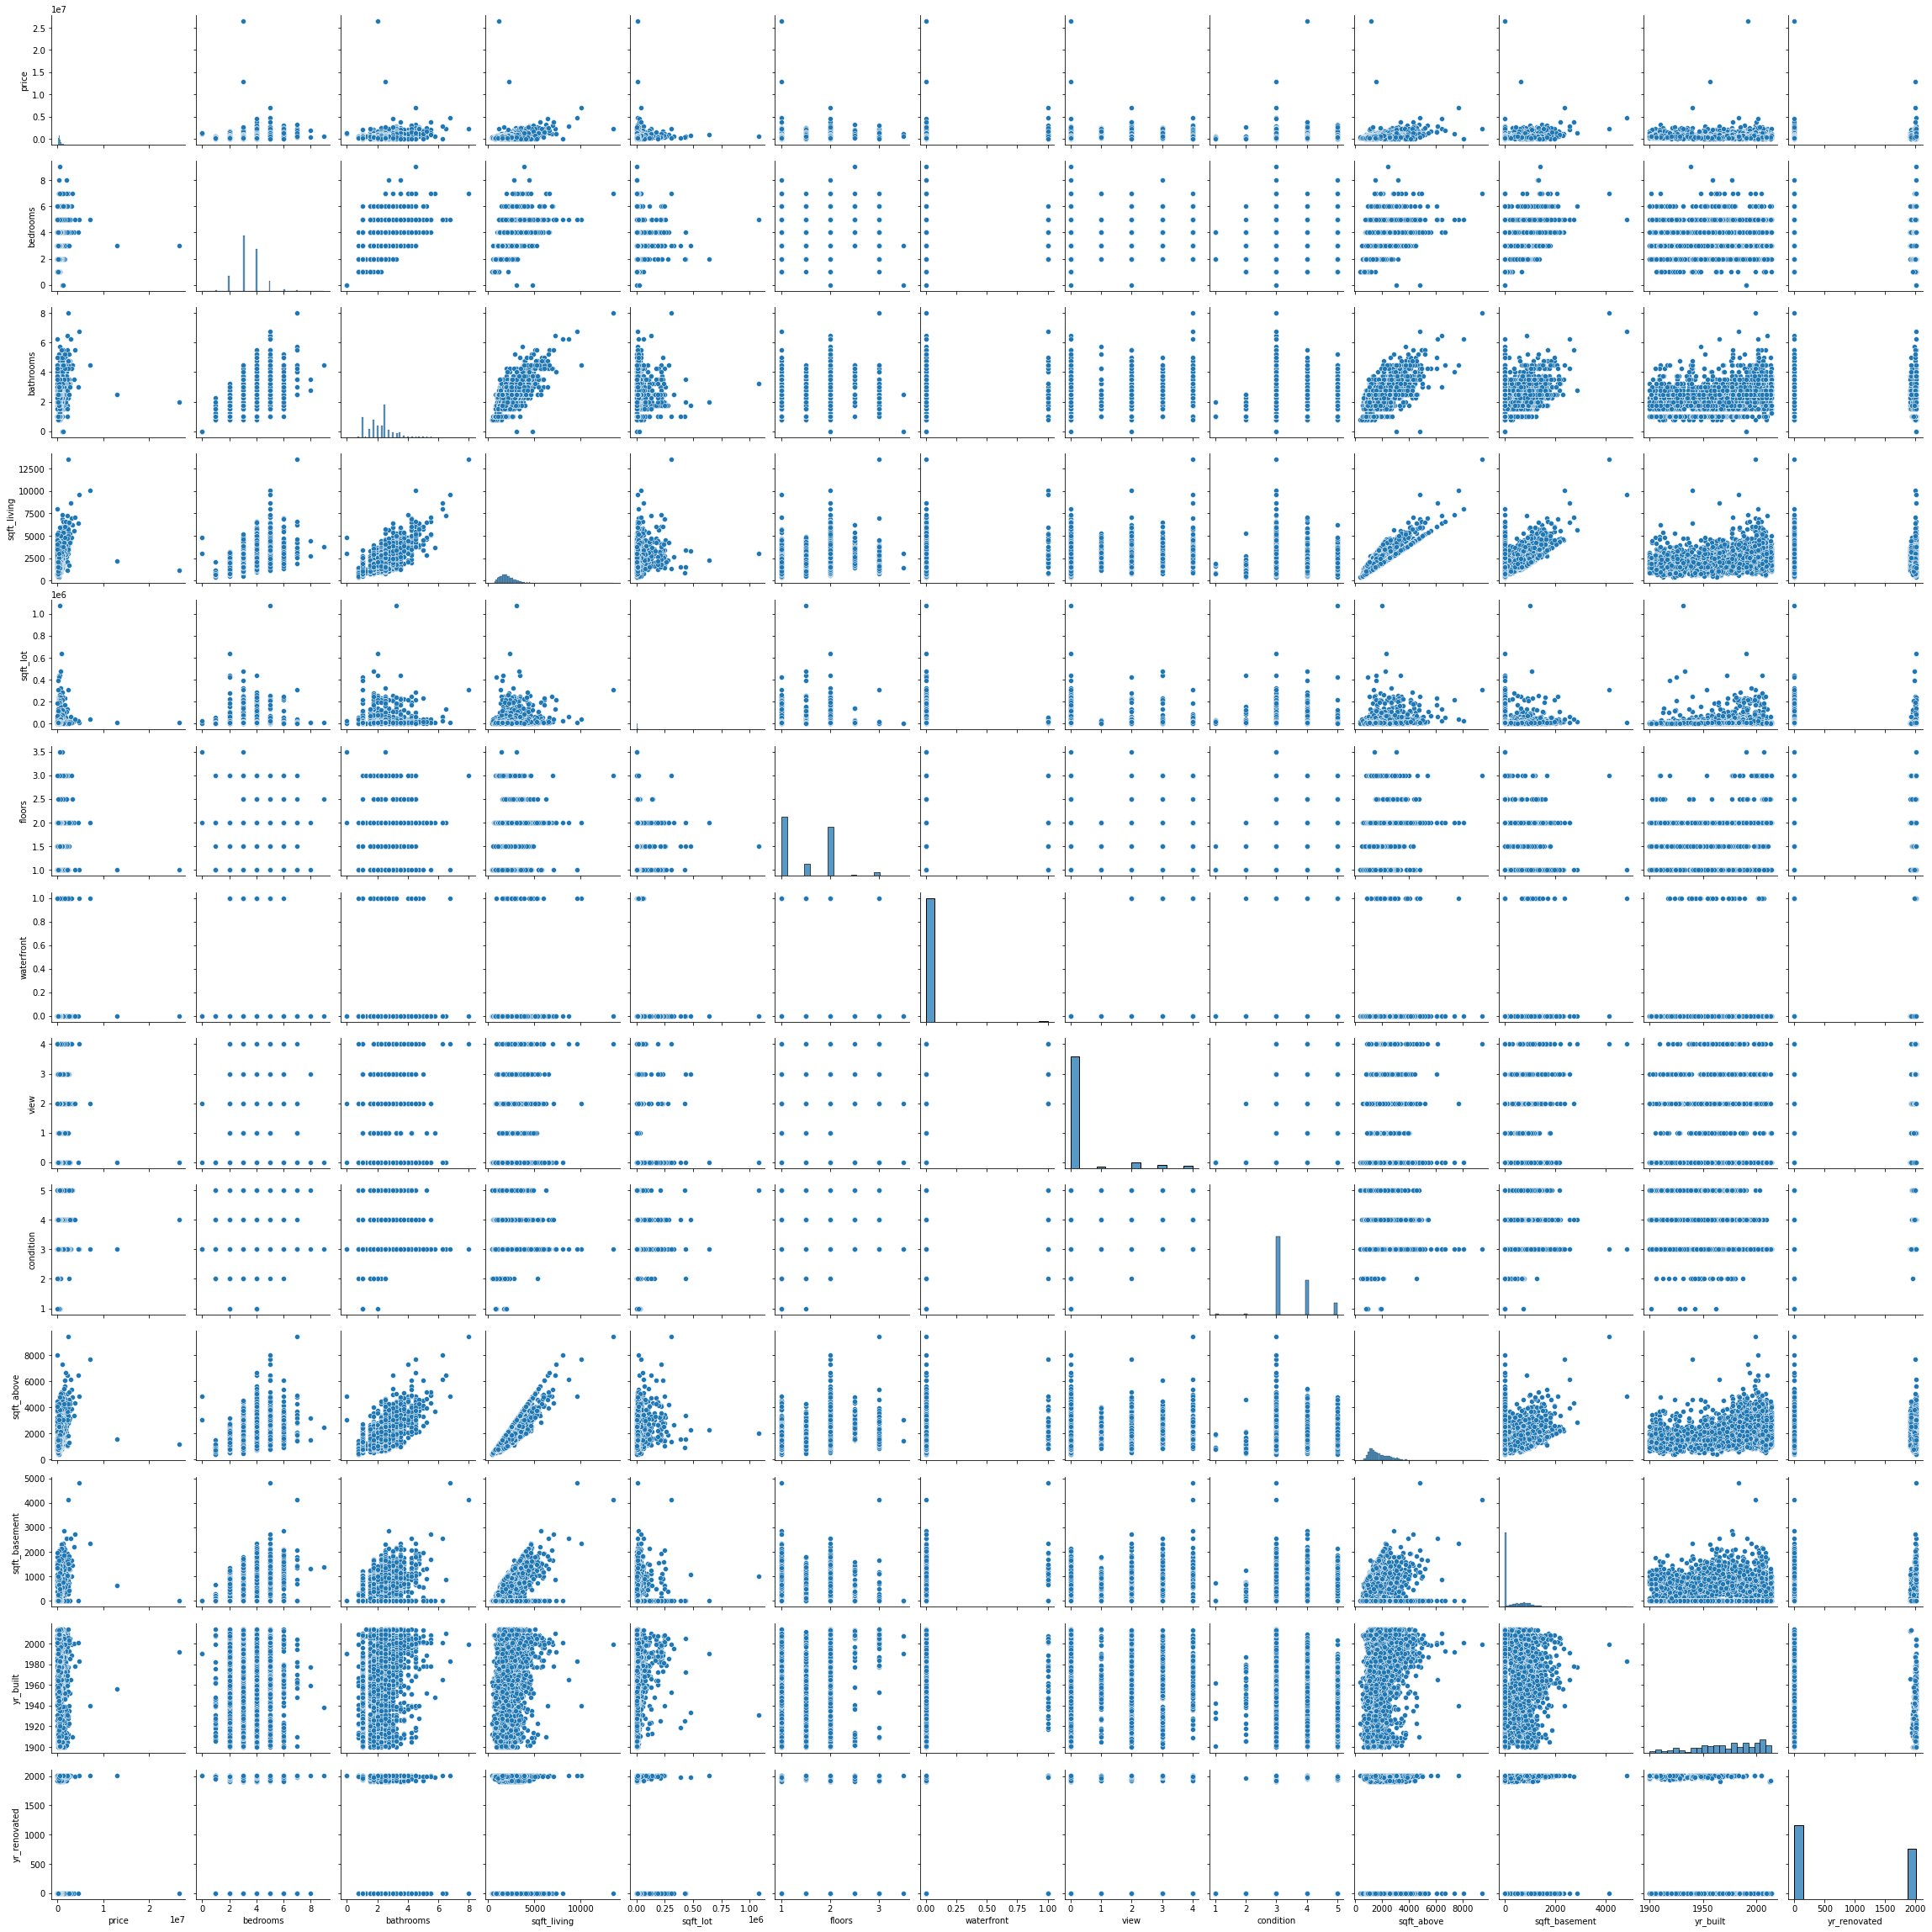

In [8]:
sns.pairplot(HouseDF)

<AxesSubplot:>

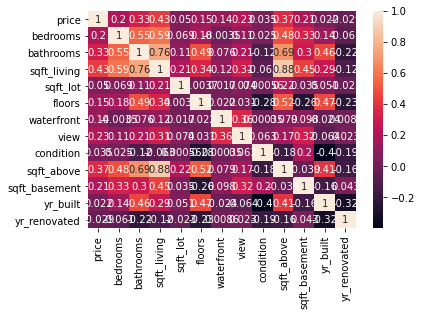

In [9]:
sns.heatmap(HouseDF.corr(), annot=True)

In [17]:
X = HouseDF[['date', 'country', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city']]

y = HouseDF['price']

In [18]:
from sklearn.model_selection import train_test_split


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train

date country  bedrooms  bathrooms  sqft_living  sqft_lot  \
4351  2014-05-06 00:00:00     USA       2.0       1.00          780     16344   
3560  2014-06-27 00:00:00     USA       3.0       1.00          910      8789   
2589  2014-06-16 00:00:00     USA       4.0       2.50         1740      7500   
3062  2014-06-23 00:00:00     USA       3.0       2.75         1100       750   
4434  2014-05-29 00:00:00     USA       4.0       2.75         2320      4344   
...                   ...     ...       ...        ...          ...       ...   
4426  2014-05-28 00:00:00     USA       3.0       1.00         1180      5002   
466   2014-05-10 00:00:00     USA       4.0       2.00         2520      6000   
3092  2014-06-23 00:00:00     USA       3.0       1.00         1150      8145   
3772  2014-07-01 00:00:00     USA       2.0       1.00          910      2002   
860   2014-05-19 00:00:00     USA       2.0       1.00         1490      3825   

      floors  waterfront  view  condition  sqft_above  sqft_basement  \
4351     1.0           0     0          1         780              0   
3560     1.0           0     0          3         910              0   
2589     1.0           0     0          4        1220            520   
3062     2.0           0     0          3         780            320   
4434     2.0           0     0          3        2320              0   
...      ...         ...   ...        ...         ...            ...   
4426     1.5           0     0          3        1180              0   
466      1.0           0     0          3        1400           1120   
3092     1.0           0     0          4         990            160   
3772     1.5           0     0          3         910              0   
860      1.0           0     0          3         860            630   

      yr_built  yr_renovated                street       city  
4351      1942             0       4229 S 144th St    Tukwila  
3560      1966          1963        636 S 188th St    Seattle  
2589      1976          1992     10342 162nd Pl NE    Redmond  
3062      2008             0  4733 Delridge Way SW    Seattle  
4434      2012          1912        4242 NE 2nd Ct     Renton  
...        ...           ...                   ...        ...  
4426      1946             0      17022 5th Ave NE  Shoreline  
466       1921          2007    6521 Fremont Ave N    Seattle  
3092      1932          1958     16232 11th Ave NE  Shoreline  
3772      1900          2005        100 20th Ave E    Seattle  
860       1929             0      7008 19th Ave NW    Seattle  

[3082 rows x 16 columns]

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

ValueError: could not convert string to float: '2014-05-06 00:00:00'

In [25]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['coefficient'])

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [29]:
predictions = lm.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [30]:
plt.scatter(y_test, predictions)

NameError: name 'predictions' is not defined